In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Vector-borne model with susceptible and infected hosts and vectors, showing a metapopulation model setup with multiple populations connected to each other by migrating hosts.

Population **A** is connected to Population **B** and to Clustered Population 4 (both are one-way connections). Clustered Populations 0-4 are all connected to each other in two-way connections.

Isolated population is not connected to any others.

Two different pathogen genotypes are initially seeded into Populations **A** and **B**.

Simulating time: 90.88859573894841, event: RECOVER_VECTOR
Simulating time: 100.002597520375 END
Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.005296945571899414s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.012111663818359375s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.02404928207397461s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.037477731704711914s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0717473030090332s.) Setting batch_size=32.
[Parallel(n_jobs=8)

...file saved.


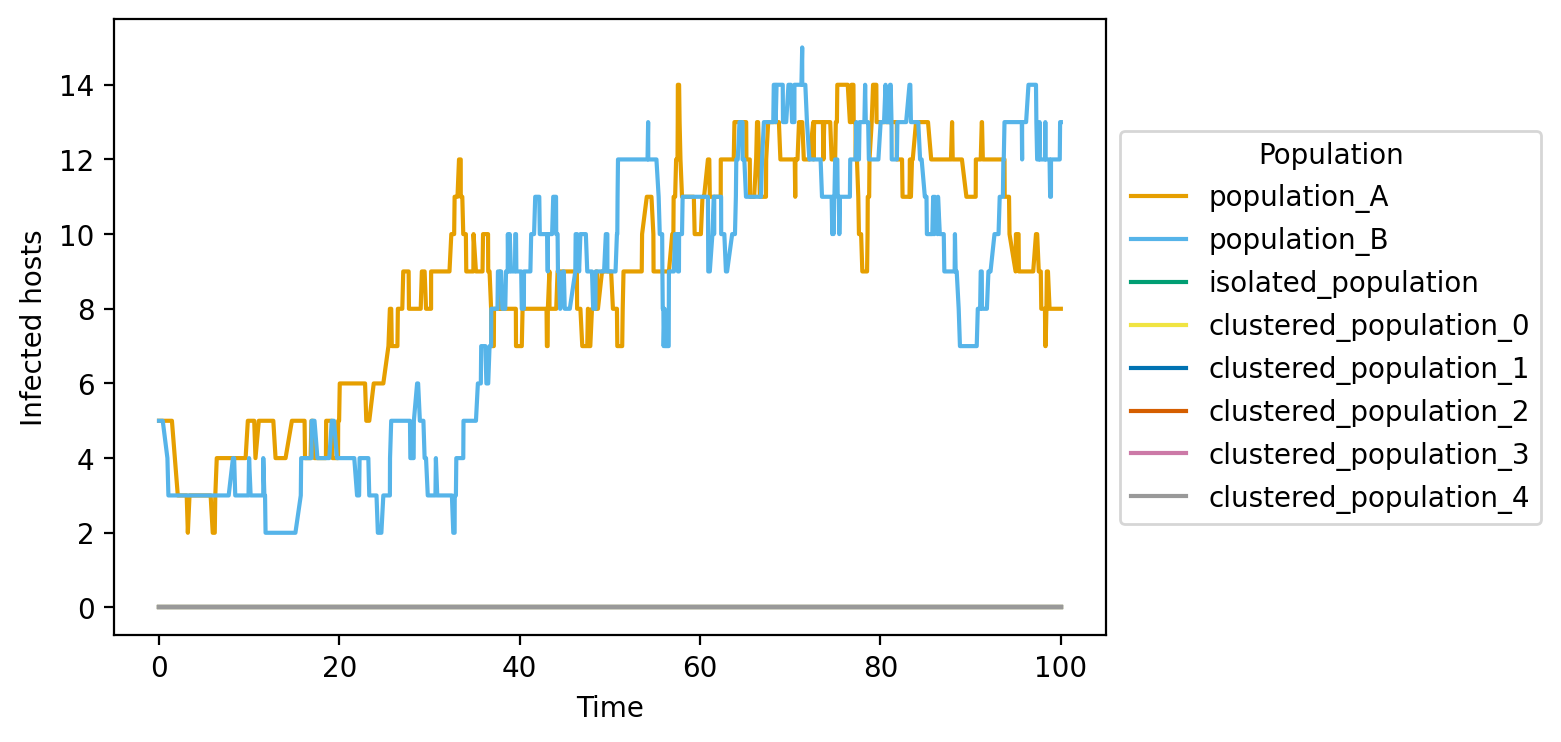

In [8]:
model = Model()
model.newSetup('setup_normal', preset='vector-borne')
model.newSetup(
    'setup_cluster',
    contact_rate_host_vector = ( 2 *
        model.setups['setup_normal'].contact_rate_host_vector ),
    preset='vector-borne'
    ) # uses default parameters but doubles contact rate of the first setup

model.newPopulation('population_A','setup_normal', num_hosts=20, num_vectors=20)
model.newPopulation('population_B','setup_normal', num_hosts=20, num_vectors=20)
    # Create two populations that will be connected.
model.newPopulation(
    'isolated_population','setup_normal', num_hosts=20, num_vectors=20
    ) # A third population will remain isolated.

model.createInterconnectedPopulations(
    5,'clustered_population_','setup_cluster',
    host_migration_rate=2e-3, 
    vector_migration_rate=0,
    host_host_contact_rate=0, 
    vector_host_contact_rate=0,
    num_hosts=20, num_vectors=20
    )
    # Create a cluster of 5 populations connected to each other with a migration
    # rate of 2e-3 between each of them in both directions. Each population has
    # an numbered ID with the prefix "clustered_population_", has the parameters
    # defined in the "setup_cluster" setup, and has 20 hosts and vectors.
model.linkPopulationsHostMigration('population_A','clustered_population_4',2e-3)
    # We link population_A to one of the clustered populations with a one-way
    # migration rate of 2e-3.
model.linkPopulationsHostMigration('population_A','population_B',2e-3)
    # We link population_A to population_B with a one-way migration rate of
    # 2e-3.

model.addPathogensToHosts( 'population_A',{'AAAAAAAAAA':5} )
    # population_A starts with AAAAAAAAAA genotype pathogens.
model.addPathogensToHosts( 'population_B',{'GGGGGGGGGG':5} )
    # population_B starts with GGGGGGGGGG genotype pathogens.

output = model.run(0,100,time_sampling=0)
data = model.saveToDataFrame('metapopulations_migration_example.csv')
graph = model.populationsPlot( # Plot infected hosts per population over time.
    'metapopulations_migration_example.png', data,
    num_top_populations=8, # plot all 8 populations
    track_specific_populations=['isolated_population'],
        # Make sure to plot th isolated population totals if not in the top
        # infected populations.
    y_label='Infected hosts' # change y label
    )